### Подготовка

In [ ]:
!pip install blocksnet iduedu mapclassify -q

In [ ]:
import geopandas as gpd
import os

In [ ]:
data_path = '/content/data' # в эту папку нужно положить geojson файл с нарезанными кварталми на прошлом занятии

In [ ]:
blocks = gpd.read_file(os.path.join(data_path, 'blocks.P.geojson')) # считываем в переменную наши кварталы

### Сборка дорожного графа

In [ ]:
from iduedu import get_boundary

bounds = get_boundary(osm_id=1547522) # (osm_id=...) передаем OSM id границ города, в данном примере г. Тюмень

In [ ]:
from iduedu import get_drive_graph

G_drive = get_drive_graph(polygon=bounds, additional_edgedata=['highway', 'maxspeed', 'reg', 'ref','name'])

In [ ]:
G_drive # в этой переменной хранится собранный граф

In [ ]:
from blocksnet import AccessibilityProcessor
AccessibilityProcessor._fix_graph(G_drive) # необходимо для исправления графа, запустить!

In [ ]:
import osmnx as ox
import matplotlib.pyplot as plt

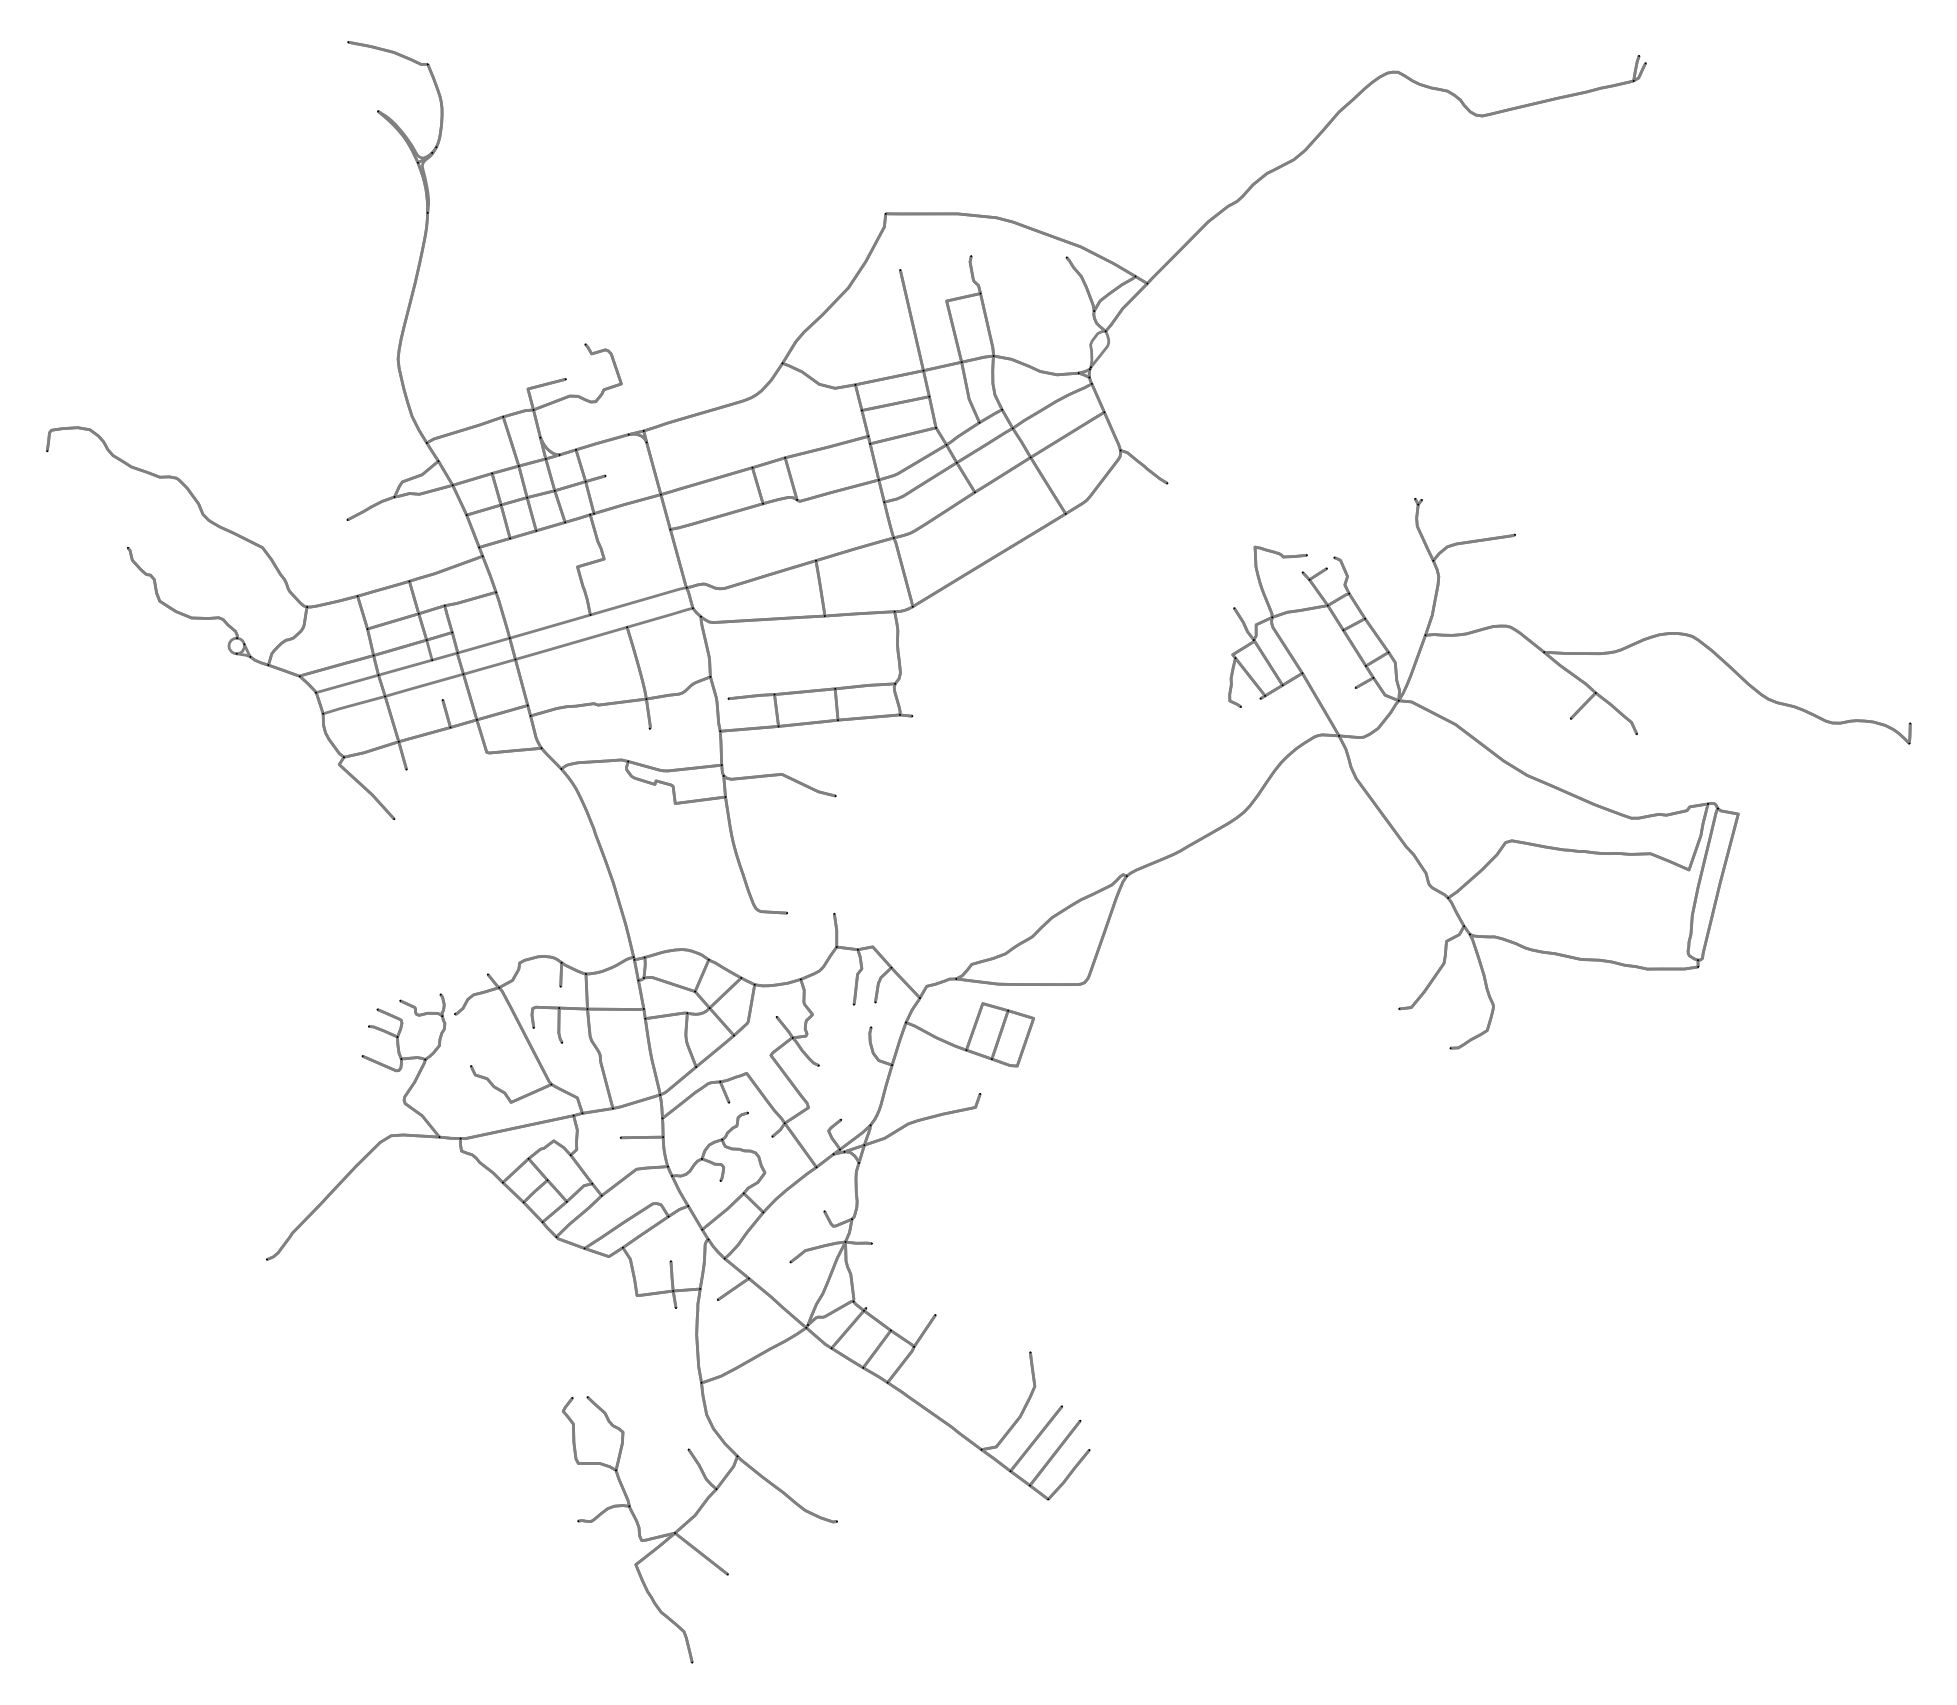

In [ ]:
fig, ax = ox.plot_graph(G_drive,
                    node_color='black', # цвет вершин
                    edge_color='grey', # цвет ребер
                    bgcolor='white', # цвет подложки
                    node_size=2, # размер верщин
                    edge_linewidth=2, # толщина ребер
                    figsize=(25,25)) # размер картинки

In [ ]:
fig.savefig(os.path.join(data_path,'drive_graph_image.png'))

In [ ]:
n,e = ox.graph_to_gdfs(G_drive)

In [ ]:
n

,y,x,street_count,highway,geometry
osmid,,,,,
262105,6.770945e+06,344155.508380,3,NaN,POINT (344155.508 6770944.822)
9836778650,6.771676e+06,344158.364858,3,NaN,POINT (344158.365 6771675.564)
1240718738,6.770887e+06,344192.561600,3,NaN,POINT (344192.562 6770886.967)
268095141,6.771028e+06,344398.183292,3,NaN,POINT (344398.183 6771027.652)
262107,6.770810e+06,344237.932848,4,NaN,POINT (344237.933 6770810.310)
...,...,...,...,...,...
7206514977,6.767912e+06,344618.506875,1,NaN,POINT (344618.507 6767911.678)
7206514999,6.767520e+06,344636.455389,1,NaN,POINT (344636.455 6767520.362)
7323781139,6.770106e+06,346741.226831,1,NaN,POINT (346741.227 6770106.478)


In [ ]:
e

length_meter  time_min  \
u          v          key                           
262105     9836778650 0         758.770     0.506   
           1240718738 0          68.709     0.046   
           268095141  0         256.919     0.385   
9836778650 1970665310 0         163.336     0.109   
           9835123731 0         227.027     0.227   
...                                 ...       ...   
7206514999 7206515060 0         178.476     0.268   
7323781139 7323781104 0         177.811     0.267   
7497820982 7497864087 0         264.483     0.397   
7497864087 9835123731 0         273.312     0.273   
           7497820982 0         264.483     0.397   

                                                                    geometry  \
u          v          key                                                      
262105     9836778650 0    LINESTRING (344155.508 6770944.822, 344141.780...   
           1240718738 0    LINESTRING (344155.508 6770944.822, 344158.404...   
           268095141  0    LINESTRING (344155.508 6770944.822, 344173.854...   
9836778650 1970665310 0    LINESTRING (344158.365 6771675.564, 344158.210...   
           9835123731 0    LINESTRING (344158.365 6771675.564, 344161.314...   
...                                                                      ...   
7206514999 7206515060 0    LINESTRING (344636.455 6767520.362, 344647.873...   
7323781139 7323781104 0    LINESTRING (346741.227 6770106.478, 346730.246...   
7497820982 7497864087 0    LINESTRING (343906.035 6772217.510, 343975.928...   
7497864087 9835123731 0    LINESTRING (344158.829 6772147.314, 344165.859...   
           7497820982 0    LINESTRING (344158.829 6772147.314, 344137.549...   

                                 highway     maxspeed  reg    ref  \
u          v          key                                           
262105     9836778650 0            trunk  1500.000000    1  А-121   
           1240718738 0            trunk  1500.000000    1  А-121   
           268095141  0     unclassified   666.666667    3    NaN   
9836778650 1970665310 0            trunk  1500.000000    1  А-121   
           9835123731 0    tertiary_link  1000.000000    3    NaN   
...                                  ...          ...  ...    ...   
7206514999 7206515060 0      residential   666.666667    3    NaN   
7323781139 7323781104 0      residential   666.666667    3    NaN   
7497820982 7497864087 0      residential   666.666667    3    NaN   
7497864087 9835123731 0         tertiary  1000.000000    1  А-121   
           7497820982 0      residential   666.666667    3    NaN   

                                                         name  
u          v          key                                      
262105     9836778650 0    [Сортавальское шоссе, «Сортавала»]  
           1240718738 0                 Красноармейская улица  
           268095141  0                        Песочная улица  
9836778650 1970665310 0                           «Сортавала»  
           9835123731 0                                   NaN  
...                                                       ...  
7206514999 7206515060 0                       Берёзовая улица  
7323781139 7323781104 0                                   NaN  
7497820982 7497864087 0                                   NaN  
7497864087 9835123731 0                           «Сортавала»  
           7497820982 0                                   NaN  

[885 rows x 8 columns]

In [ ]:
n.to_file(os.path.join(data_path,"G_drive_nodes.geojson"))

In [ ]:
e.to_file(os.path.join(data_path,"G_drive_edges.geojson"))

### Создание матрицы доступности и квартально-сетевой модели + вычисление транспортной доступности и связности

In [ ]:
from blocksnet import AccessibilityProcessor

ap = AccessibilityProcessor(blocks)

In [ ]:
acc_mx = ap.get_accessibility_matrix(G_drive)
acc_mx.head() # вывод первых 5 строк полученной матрицы

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,256,257
0,0.000000,1.917969,3.023438,3.722656,8.617188,5.406250,6.785156,8.929688,4.921875,4.984375,...,3.023438,3.023438,5.464844,3.804688,5.464844,5.464844,5.464844,4.710938,5.464844,5.464844
1,1.917969,0.000000,1.235352,5.640625,6.898438,3.687500,5.066406,7.210938,3.203125,3.265625,...,1.235352,1.235352,4.355469,2.400391,4.355469,4.355469,4.355469,3.601562,4.355469,4.355469
2,3.023438,1.235352,0.000000,6.746094,5.972656,2.759766,4.140625,6.281250,2.277344,2.337891,...,0.000000,0.000000,3.427734,1.472656,3.427734,3.427734,3.427734,2.673828,3.427734,3.427734
3,3.732422,5.648438,6.753906,0.000000,11.953125,8.742188,10.117188,12.265625,8.257812,8.320312,...,6.753906,6.753906,8.796875,7.140625,8.796875,8.796875,8.796875,8.046875,8.796875,8.796875
4,8.515625,6.898438,5.972656,12.000000,0.000000,3.210938,1.832031,0.557129,5.121094,4.765625,...,5.972656,5.972656,7.531250,5.578125,7.531250,7.531250,7.531250,6.777344,7.531250,7.531250


In [ ]:
acc_mx.to_pickle(os.path.join(data_path, 'acc_mx.pickle'))

In [ ]:
from blocksnet.models import City

In [ ]:
blocks['land_use'] = None

In [ ]:
city = City(
    blocks=blocks,
    acc_mx=acc_mx
)

In [ ]:
print(city)

CRS : EPSG:32636
Blocks : 258
Service types : 0/66
Buildings : 0
Services : 0



In [ ]:
city.to_pickle(os.path.join(data_path,'city_model.pickle'))

In [ ]:
from blocksnet import Accessibility, Connectivity

In [ ]:
accessibility = Accessibility(city_model=city)
block = city[60] # квартал от которого будем считать доступность
result = accessibility.calculate(block)

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Визуализация

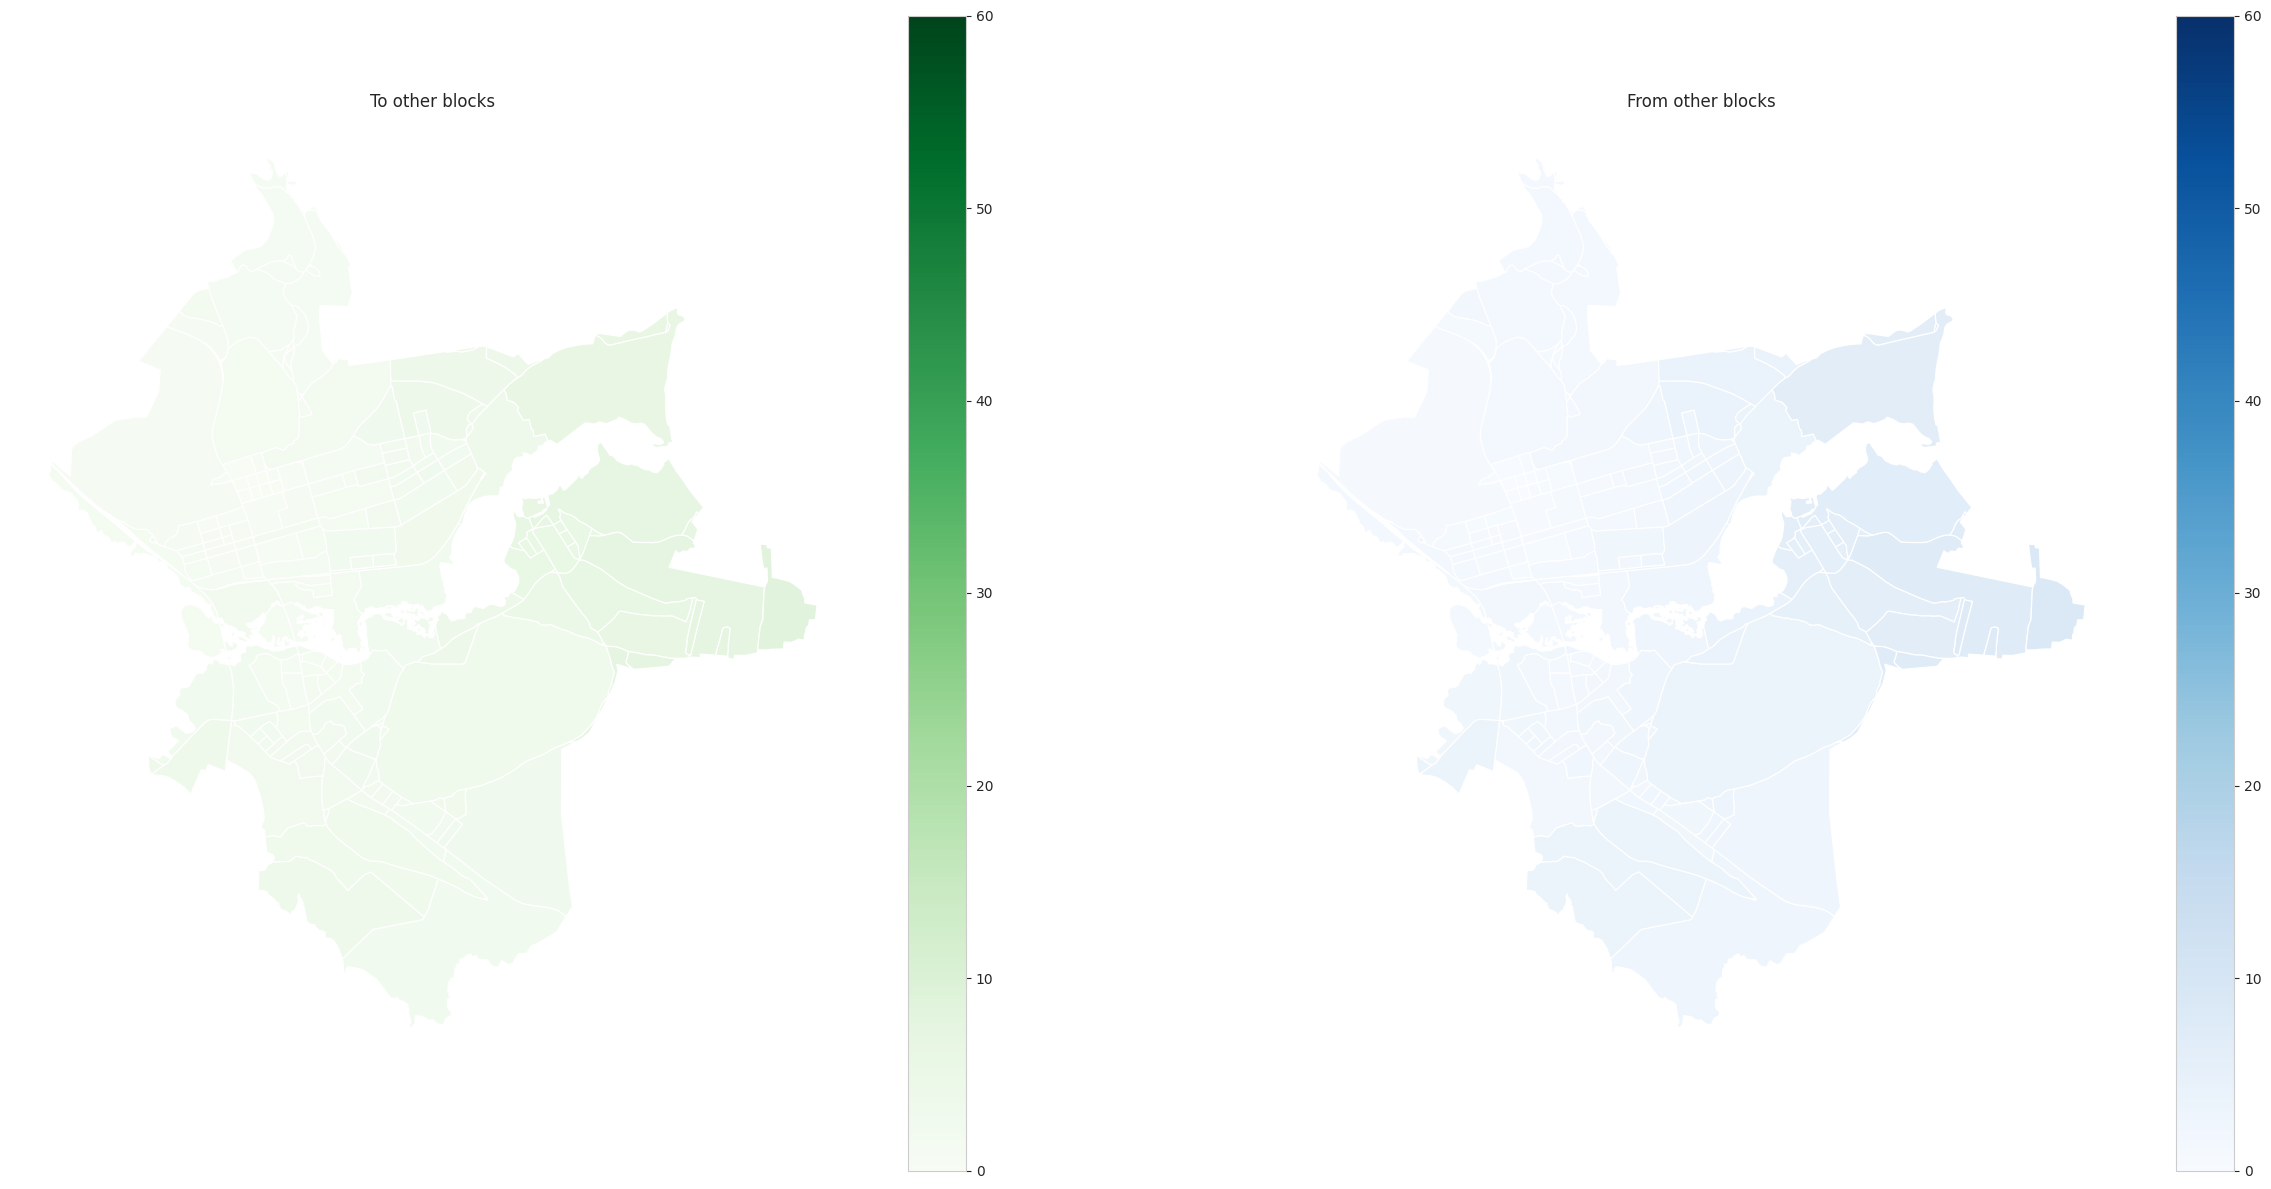

In [ ]:
Accessibility.plot(result, linewidth=0.9, figsize=(30,15))

In [ ]:
result.to_file(os.path.join(data_path, 'accessibility.geojson'))

In [ ]:
connectivity = Connectivity(city_model=city)
connectivity_result = connectivity.calculate()

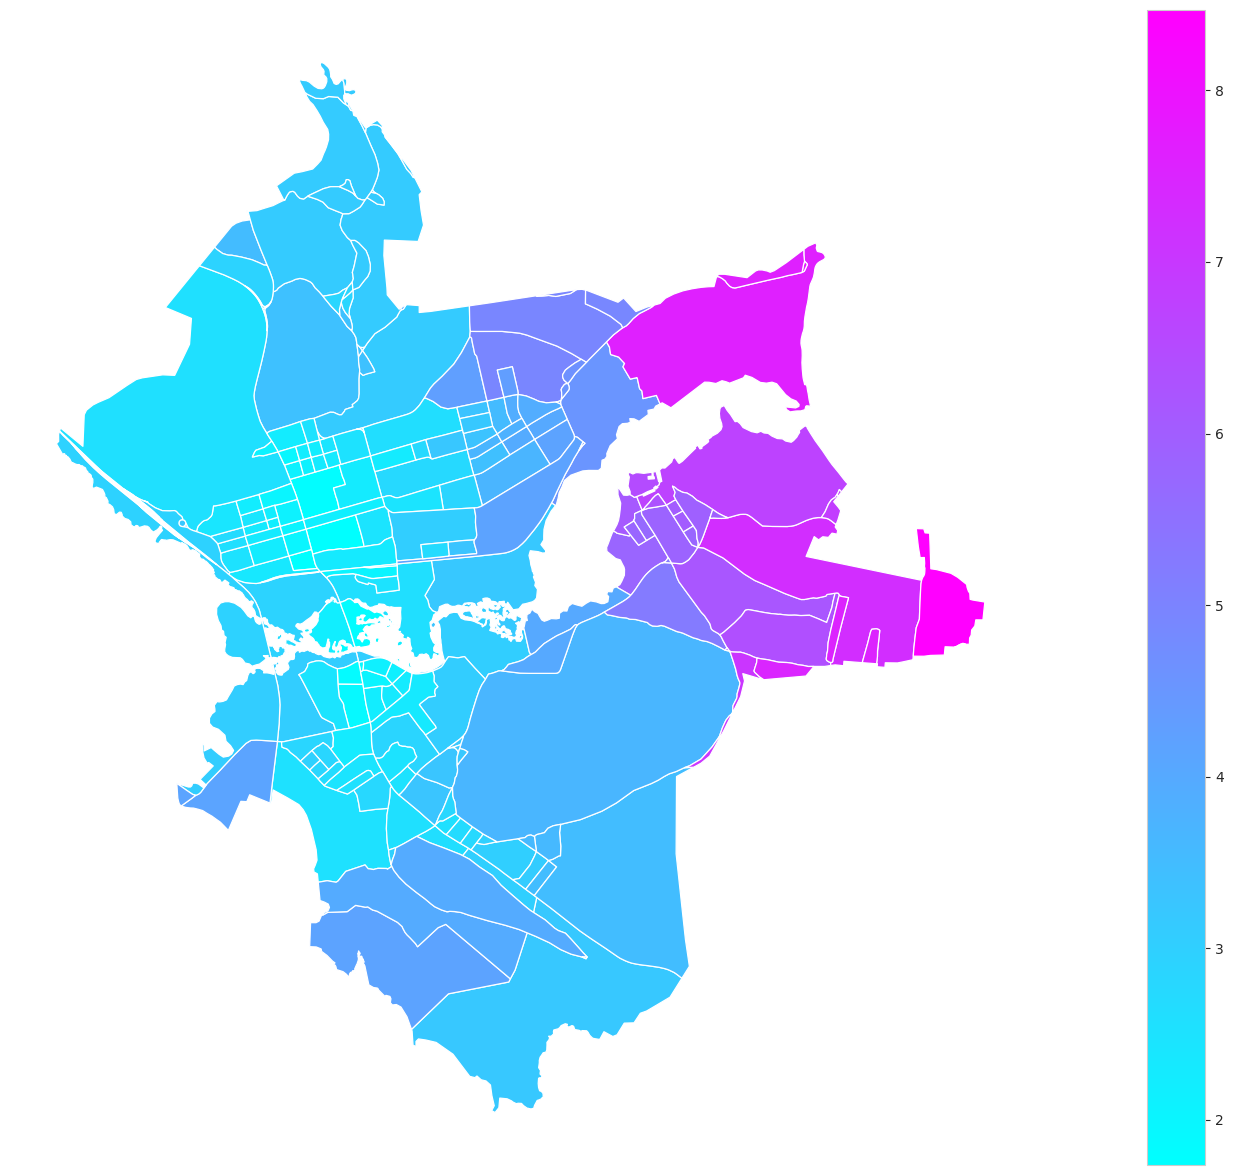

In [ ]:
Connectivity.plot(connectivity_result, linewidth=0.9, figsize=(30,15))

In [ ]:
connectivity_result.to_file(os.path.join(data_path, 'connectivity.geojson'))

### Интермодальный граф общественного транспорта

Задание по желанию: попробуйте собрать интермодальный граф с помощью метода из BlocksNet ```get_intermodal_graph``` (пример в ячейке ниже), вычислить на основе этого графа новую матрицу доступности для ваших кварталов, собрать квартально-сетевую модель, посчитать доступность и связность и сравнить полученные результаты с моделью на дорожном графе.

In [ ]:
G_inter = ap.get_intermodal_graph()

Calculating the weights of the walk graph:   0%|          | 0/7672 [00:00<?, ?it/s]